# Restaurants cleanliness -- San Francisco

In this analysis, we inspect San Francisco restaurants using publicly available data from the Department of Public health.  We will explore this data to map the cleanliness of the city, and get a better perspective on the relative meaning of these scores by looking at statistics of the data.


In [7]:
# Import pylab to provide scientific Python libraries (NumPy, SciPy, Matplotlib)
%pylab --no-import-all
#import pylab as pl
# import the Image display module
from IPython.display import Image

# inline allows us to embed matplotlib figures directly into the IPython notebook
%pylab inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [8]:
Image(url='http://assets.zipfianacademy.com/data/data-science-workflow/animate.gif', width=700)

## ___Problem___

> ### How clean are SF restaurants?

#### Let us review the important points to keep in mind when defining our problem:
    
* The question can be ___qualitative___, but the approach, must be ___quantifiable___ 
* What am I ___looking___ for? 
* What do I want to ___learn___?
* Alright to be ___exploratory___ (and the best analysis often are)


<a id="goals"></a>
## ___Goal___

Since our _Problem Statement_ is often qualitative and broad, we can ask further questions to better define what we hope to achieve.

> How does an individual restaurants' score compare to the whole/aggregate of SF?

> Are SF's inspections better or worse than other cities?

> If a restaurant has not yet been inspected, can we approximate/predict what score it will receive? 

#### Points to note about our goals and approach:

* Determine what deﬁnes __success__, and to what degree.
* Brainstorm __metrics__ to visualize and/or calculate.
* Ask __questions__ that have (or can have) a definitive answer.
* Be careful what you wish for, be aware of possible __correlations__, and take caution while measuring it.

## ___Explore Data___

#### To recap where we are in our analysis:
    
* Question -- ___How clean are SF restaurants?___
* Quantifiable metrics to collect -- ___Individual scores, summary statistics about distribution of scores, other cities' inspection data to compare___ 

The ___Explore___ stage of the analysis is where we will most likely spend most of our time. At this stage we will use a variety of tools to figure out where and how to obtain data, what it looks like once we have it, and how to use it to answer of questions to achieve our goals.

### Acquire

Luckily, San Francisco has much of its public government data freely accessible initiatives by SF companies collaborating with non-profits and government to develop open data standards.

### Examine

_Download the data files into the same directory which you ran the_ `ipython notebook`  _command_

Now that we have found the relevant data we can begin to peer inside to understand what we are working with. Starting with an iterative approach, using the quickest/easiest tools first and slowly build to more complicated analyes.  UNIX provides us with many powerful tools. 

In [11]:
# Display a few lines of data to understand its format and fields
#__`head` is a UNIX command to print only the first few lines of a file (in this case 5)
#This is very useful for exploring very large files very quickly and easily.  

# '!' instructs IPython to run a shell command
# http://ipython.org/ipython-doc/rel-0.13.1/interactive/reference.html#system-shell-acces
import pandas as pd
businesses=pd.read_csv('businesses.csv')
#!head -n 5 businesses.csv
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,NaN
1,12,KIKKA,250 EMBARCADERO 7/F,San Francisco,CA,94105,37.788613,-122.393894,NaN
2,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10
3,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,NaN
4,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,NaN


In [13]:
# [PROTIP]: IPython has built in tab completion for commands.  
# Partially type a command or file name and hit tab.
#!head -n 5 data/SFBusinesses/inspections.csv
inspections=pd.read_csv('inspections.csv')
inspections.head()

,business_id,Score,date,type
0,10,98,20121114,routine
1,10,98,20120403,routine
2,10,100,20110928,routine
3,10,96,20110428,routine
4,10,100,20101210,routine


In [14]:
violations=pd.read_csv('violations.csv')
violations.head()
#!head -n 5 data/SFBusinesses/violations.csv

,business_id,date,description
0,10,20121114,Unclean or degraded floors walls or ceilings ...
1,10,20120403,Unclean or degraded floors walls or ceilings ...
2,10,20110428,Inadequate and inaccessible handwashing facili...
3,12,20120420,Food safety certificate or food handler card n...
4,17,20120823,Inadequately cleaned or sanitized food contact...


In [17]:
# Pretify it using the UNIX command 
#__`column` is used to format its input into multiple columns.  
#It also is useful for [formating](http://linux.about.com/library/cmd/blcmdl1_column.htm) 
#columns already present in delimited data (CSV for example).  
#With this command we used UNIX [pipes](http://en.wikipedia.org/wiki/Pipeline_(Unix)), 
#one of the most powerful and useful aspects of working in a terminal.__

#!head -n 5 data/SFBusinesses/violations.csv | column -t -s ','
#!head -n 5 data/SFBusinesses/ScoreLegend.csv | column -t -s ','

In [19]:
#%%bash

# We can use IPython cell 'magics' to run a cell in a subprocess. In this case we run
# the entire cell in a bash process (notice no exclamation point before the shell command)
businesses_plus=pd.read_csv('businesses_plus.csv')
businesses_plus.head()
#head -n 5 data/SFFoodProgram_Complete_Data/businesses_plus.csv

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_no,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,NaN,H24,NaN,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,12,KIKKA,250 EMBARCADERO 7/F,San Francisco,CA,94105,37.788613,-122.393894,NaN,H24,NaN,7/12/2002 0:00:00,"KIKKA ITO, INC.",431 South Isis Ave.,Inglewood,CA,90301
2,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,(141) 555-5314,H24,NaN,4/5/1975 0:00:00,"LIEUW, VICTOR & CHRISTINA C",648 MACARTHUR DRIVE,DALY CITY,CA,94015
3,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
4,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,NaN,H24,NaN,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104


__IPython cell [magics](http://nbviewer.ipython.org/url/github.com/ipython/ipython/raw/master/examples/notebooks/Cell%20Magics.ipynb) and other tricks__

In [20]:
#%%bash
# Can we somehow compare the columns?

#head -n 1 data/SFFoodProgram_Complete_Data/businesses_plus.csv | awk -F, '{ print NF }'
#head -n 1 data/SFBusinesses/businesses.csv | awk -F, '{ print NF }'

__We see here that in SFFoodProgram_Complete_Data/ the files seem to be augmented with additional data.  The file has almost twice as many fields present.___We used awk to figure this out by passing in the header row from the file to a simple `awk` script to count the number of fields (NF).__AWK is actually a programming language (in addition to a command line utility) and can by quite powerful if used correctly.  This is going to be one of the standard tools at our disposal as a data scientist to explore and manipulate data.__

In [21]:
# In addition to the extra fields, is anything else different?

#!wc data/SFBusinesses/businesses.csv data/SFFoodProgram_Complete_Data/businesses_plus.csv

wc is another standard UNIX utility that we will find ourself coming back to time and time again.  Here we compare the line counts (number of records) and sizes of the files.__
__The first column is the number of newlines, or how many records are contained.  The second column is word count and the last the number of bytes__

Some interesting things to note from this very simple (yet illustrative) exploration of our data.  As we might have guessed, the files in the `SFFoodProgram_Complete_Data/` have more information added to the original `SFBusinesses/` files.  While the 'complete' data has more columns, there are actually fewer records (__6353 compared to 6384__) possibly due to the fact that it is harder to get the additional data for the businesses.  But while a few businesses might be missing (__~30__), there is almost twice as much data (__656KB compared to 1.2MB__) in the 'complete' files if we look at byte counts. 

We can endlessly explore and compare these files and contents. Given these new insights, we have enough information to continue on with our analysis.

### Data Munging

This is typically most tedious process when working with messy data. Due to increasing awareness of the importance of data quality, the city of SF has been making great strides in more open and accessible data. 

The preparation process of our analysis is not as long and cumbersome as it typically might be due to the high quality of the raw data. we will get much deeper into data acquisition and scrubbing techniques in our data wrangling.

### Transform

Now that we know the structure of our data, we can start to begin examining it statistically to get a macrosopic look at its distribution.  This part of our tutorial will use much of the powerful built in functionality of [NumPy](http://www.numpy.org/), [SciPy](http://www.scipy.org/), [matplotlib](http://matplotlib.org/), and [pandas](http://pandas.pydata.org/).  

In [22]:
'''
To perform some interesting statistical analyses, we first need to "join" our CSV files in order to associate businesses 
with their inspection scores. This data currently resides in SFBusinesses/businesses.csv and SFBusinesses/inspections.csv
'''

# import pandas library which provides an R like environment for python.
# if you do not have it installed: sudo easy_install pandas.
import pandas as pd
import scipy as sp
from scipy import stats

# store relevant file paths in variables since we may use them frequently
#root_dir = 'data/SFBusinesses/'
businesses = 'businesses.csv'
inspections = 'inspections.csv'


# load each file into a Pandas DataFrame, pandas automatically converts the first line into a header for the columns

df_business = pd.read_csv(businesses)
df_inspection = pd.read_csv(inspections)

# inspect the first 10 rows of the DataFrame
df_inspection.head(10)

,business_id,Score,date,type
0,10,98,20121114,routine
1,10,98,20120403,routine
2,10,100,20110928,routine
3,10,96,20110428,routine
4,10,100,20101210,routine
5,12,100,20121120,routine
6,12,98,20120420,routine
7,12,100,20111018,routine
8,12,100,20110401,routine
9,17,100,20120823,routine


In [23]:
'''
we can 'join' DataFrames just as we would database tables
pandas uses a left-outer join by default, meaning that all 
the records from the businesses will be present even if there
is not a corresponding row in the inspections.
'''

# join the two DataFrames on the 'business_id' column
big_table = df_business.merge(df_inspection, on='business_id')

# the joined DataFrame columns: frame1 columns + frame2 columns
# in our case it is the concatenation of df_business and df_inspection columns
print 'Business:\t' + str(df_business.columns) + '\n'
print 'Inspection:\t' + str(df_inspection.columns) + '\n'
print 'Big Table:\t' + str(big_table.columns)

# allows for row and column indexing succinctly
big_table.iloc[:10, :4]

Business:	Index([u'business_id', u'name', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'phone_number'],
      dtype='object')

Inspection:	Index([u'business_id', u'Score', u'date', u'type'], dtype='object')

Big Table:	Index([u'business_id', u'name', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'phone_number', u'Score', u'date', u'type'],
      dtype='object')


,business_id,name,address,city
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
1,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
2,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
3,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
4,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
5,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
6,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
7,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
8,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
9,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco


__Now that we have our joined data, we can start exploring it__

In [25]:
# let us first group our data by business so we can find its most recent score for the inspections
import warnings
warnings.filterwarnings('ignore')

grouped_business = big_table.groupby('business_id')

# a funtion that takes a DataFrame and returns the row with the newest date
def most_recent(df, column='date'):
    return df.sort_index(by=column)[-1:]
    
# input to most_recent is the DataFrame of each group, in this case 
# all of the rows and columns for each business (grouped on business_id). 
most_recent_inspection_results = grouped_business.apply(most_recent)
 
# We applied the most_recent function to extract the row
# of the DataFrame with the most recent inspection.
most_recent_inspection_results.head()

,,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,date,type
business_id,,,,,,,,,,,,,
10,0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,NaN,98,20121114,routine
12,5,12,KIKKA,250 EMBARCADERO 7/F,San Francisco,CA,94105,37.788613,-122.393894,NaN,100,20121120,routine
17,9,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine
19,13,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,NaN,100,20121127,routine
24,18,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,NaN,100,20121018,routine


In [26]:
# Filter out records without lat/long for mapping
r = most_recent_inspection_results

zero_filtered = r[(r['latitude'] != 0) & (r['latitude'] != 0)]

filtered = zero_filtered.dropna(subset=['latitude', 'longitude'])[['business_id','name', 'address', 'Score', 'date', 'latitude', 'longitude']]

filtered.to_csv('geolocated_rest.csv', index=False)

### Split-Apply-Combine
A visual representation of how group-by, aggregate, and apply semantics work 

__We can bin the restaurants by scores to understand the distribution of inspections better.  Here we create a histogram to understand the distribution of scores better__

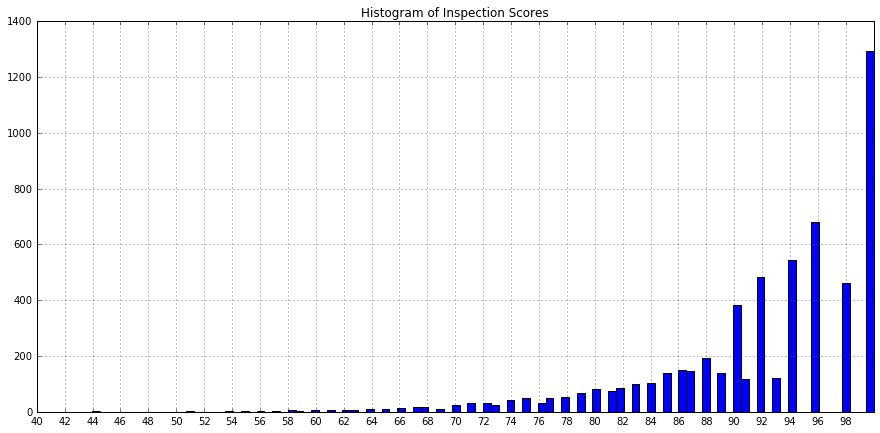

In [29]:
from scipy.stats import expon

# create a matplotlib figure with size [15,7]
figure(figsize=[15,7])

# pandas built-in histogram function automatically distributes and counts bin values 
h = most_recent_inspection_results['Score'].hist(bins=100)

# create x-axis ticks of even numbers 0-100
xticks(np.arange(40, 100, 2))

# add a title to the current figure, our histogram
h.set_title("Histogram of Inspection Scores")



In [30]:
# Now that we have a basic idea of the distribution, let us look at some more interesting statistics
scores =  most_recent_inspection_results['Score']
mean = scores.mean()
median = scores.median()

# compute descriptive summary statistics of the inspection scores
summary = scores.describe()

mode = sp.stats.mode(scores)
skew = scores.skew()

# compute quantiles
ninety = scores.quantile(0.9)
eighty = scores.quantile(0.8)
seventy = scores.quantile(0.7)
sixty = scores.quantile(0.6)

print "Skew: " + str(skew)
print "90%: " + str(ninety)
print "80%: " + str(eighty)
print "70%: " + str(seventy)
print "60%: " + str(sixty)
print summary

Skew: -1.38406008151
90%: 100.0
80%: 100.0
70%: 98.0
60%: 96.0
count    5824.000000
mean       91.590659
std         8.296706
min        44.000000
25%        88.000000
50%        94.000000
75%        98.000000
max       100.000000
Name: Score, dtype: float64


## ___Propose Solutions___

Since we have explored our data and have a better idea of its nature, we can begin to devise a plan to answer our questions. This is usually the most iterative part of the entire process: as we learn more about our data we modify our approach, and as modify our solutions we must re-examine our data.

#### Goals:
> How does an individual restaurants' score compare to the whole/aggregate of SF?

> Are SF's inspections better or worse than other cities?

> If a restaurant has not yet been inspected, can we approximate/predict what score it will receive? 

#### Solutions:
> Collect summary statistics (mean, median, standard deviation, etc.) about distribution of scores.

> Acquire data on inspection scores for other cities, compare distribution of cities.

> Perform a linear regression on historic data on past inspections combined with scores from other 'similar' restaurants.

#### Points to note about formulating solutions:

* Ask, how can I address the problem?
* In what ways can I use the data to achieve my goals?
* The simplest solution is often best
* Quantize the metrics needed for the analysis

## ___Collect Metrics___
    
___The purpose of this part of the process is to calculate the information you need to begin evaluating and testing your solutions and hypotheses.___

In [31]:
# recall that in the Score Legend, each numeric score corresponds to a more qualitative description
#!head -n 5 data/SFBusinesses/ScoreLegend.csv | column -t -s ','
df_ScoreLegend = pd.read_csv('ScoreLegend.csv')
df_ScoreLegend.head()

,Minimum_Score,Maximum_Score,Description
0,0,70,Poor
1,71,85,Needs Improvement
2,86,90,Adequate
3,91,100,Good


In [32]:
'''
let us compute a histogram of these descriptions as well
'''

# first we need to discretize the numerical values, this can be 
# thought of as converting a continuous variable into a categorical one.
descriptions = ['Poor', 'Needs Improvement', 'Adequate', 'Good']
bins = [-1, 70, 85, 90, 100]

# copy the scores from our grouped DataFrame, DataFrames manipulate
# in place if we do not explicitly copy them.
scores = most_recent_inspection_results['Score'].copy()
score_transform = most_recent_inspection_results.copy()

# built-in pandas funcion which assigns each data point in 
# 'scores' to an interval in 'bins' with labels of 'descriptions'
discretized_scores = pd.cut(scores, bins ,labels=descriptions)

In [33]:
# tranform the original DataFrame's "Score" column with the new descriptions
score_transform['Score'] = discretized_scores

score_transform[['name', 'date','Score']].head(15)

,,name,date,Score
business_id,,,,
10,0,TIRAMISU KITCHEN,20121114,Good
12,5,KIKKA,20121120,Good
17,9,GEORGE'S COFFEE SHOP,20120823,Good
19,13,NRGIZE LIFESTYLE CAFE,20121127,Good
24,18,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,20121018,Good
29,23,CHICO'S PIZZA,20121228,Adequate
31,28,NORMAN'S ICE CREAM AND FREEZES,20121217,Good
37,33,CAFE BISTRO,20130130,Good
40,38,MO'S COFFEE BAR,20121213,Good


__By quantizing the scores of the restaurant inspections, we can get a better qualitative insight into the ratings.  Let us compare this new distribution of quantized scores to the raw numeric values.__

## ___Evaluate___

With the metrics we need properly calculated, it is time to draw some conclusions from our analyses.  We need to evaluate whether the result we have arrived at:
    
* Answers our original question to an acceptable level of confidence.
* Has allowed us to achieve our goals? 

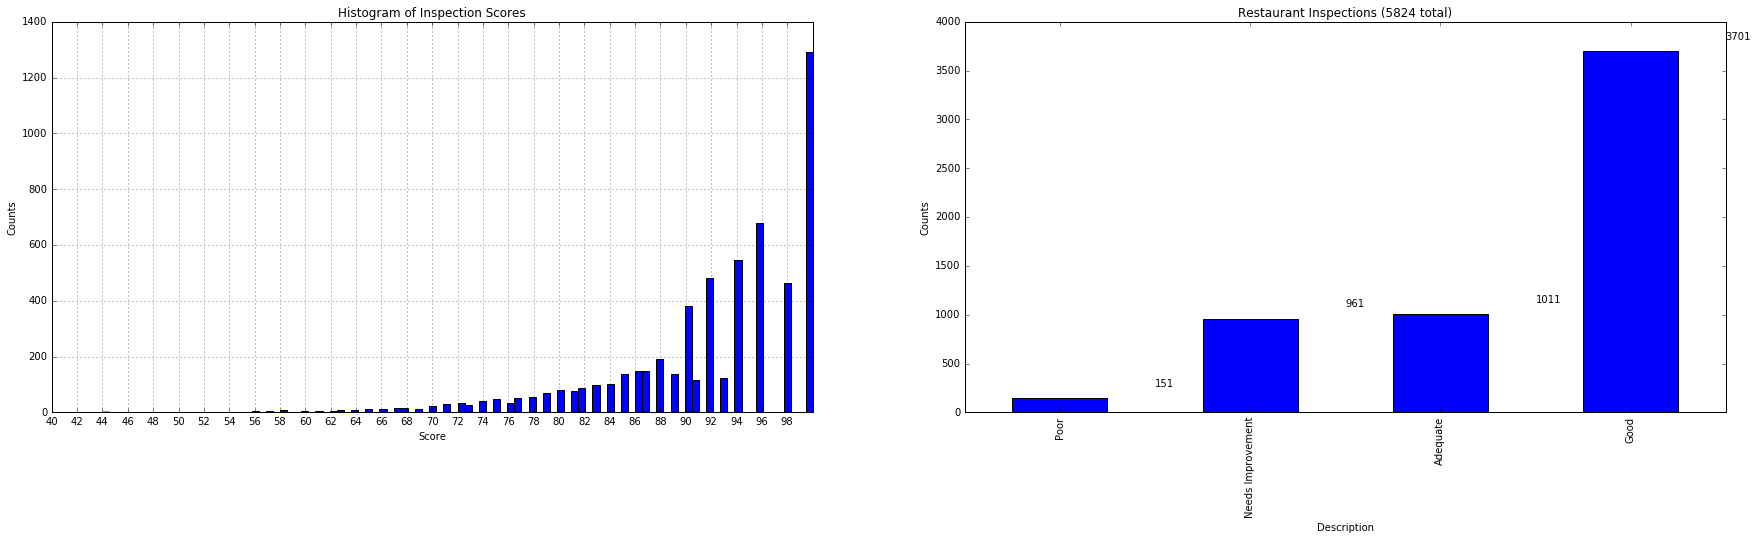

In [38]:
'''
plot a histogram of the discretized scores
'''

# create a figure with 2 subplots
fig = figure(figsize=[30,7])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# count each occurance of descriptions in the 'Score' column,
# and reverse this result so 'Poor' is left most and 'Good' right most
counts = score_transform['Score'].value_counts()[::-1]
plt = counts.plot(kind='bar', ax=ax2)

# decorate the plot and axis with text
ax2.set_title("Restaurant Inspections (%i total)" % sum(counts))
ax2.set_ylabel("Counts")
ax2.set_xlabel("Description")

# let us add some labels to each bar
for x, y in enumerate(counts):
    plt.text(x + 0.5, y + 200, '%.f' % y, ha='left', va= 'top')
    
# plot the original raw scores (same grapoh as earlier)
most_recent_inspection_results['Score'].hist(bins=100, ax= ax1)
# create x-axis ticks of even numbers 0-100
ax1.set_xticks(np.arange(40, 100, 2))

# add a title to the current figure, our histogram
ax1.set_title("Histogram of Inspection Scores")
ax1.set_ylabel("Counts")
ax1.set_xlabel("Score")

savefig('histograms.png', bbox_inches=0)

We can see that a majority of restaurants are __adequate__ or __good__, according to the quantiles only __25%__ have scores less than __88__.  While the histogram of the numeric scores gives us a more granular look at the data, it can be quite difficult to derive value from it.  Is an __86__ a filthy/unhealthy restaurant or did it simply forget a few nuanced inspection rules?  The Score Legend provides us a mapping from a raw score to a meaningful value, similar to the scaling of standardized test raw scores. 

If we are not satisfied with our evaluation, we need to iterate on our approach:
    
* Do I need more/better data?
* Do I need to try a different proposed solution?
* Do I need to calculate different metrics?

count    5824.000000
mean       91.590659
std         8.296706
min        44.000000
25%        88.000000
50%        94.000000
75%        98.000000
max       100.000000
Name: Score, dtype: float64


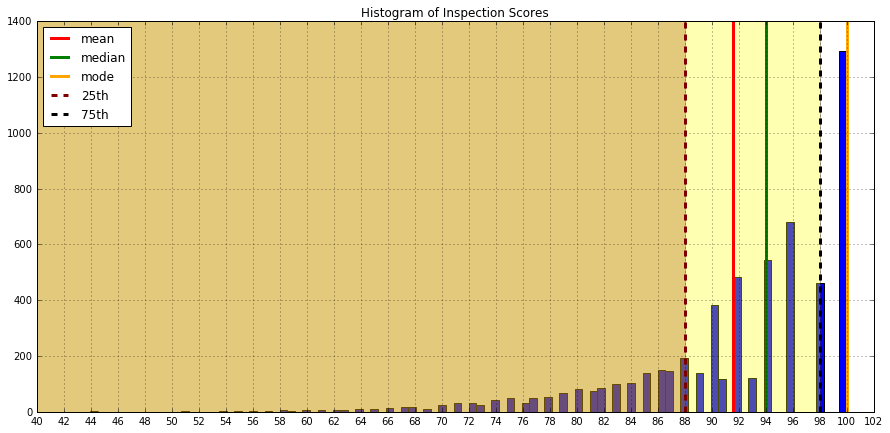

In [41]:
# create a matplotlib figure with size [15,7]
figure(figsize=[15,7])

# pandas built-in histogram function automatically distributes and counts bin values 
h = most_recent_inspection_results['Score'].hist(bins=100)

# summary statistics vertical lines
axvline(x=mean,color='red',ls='solid', lw="3", label="mean")
axvline(x=median,color='green',ls='solid', lw="3", label="median")
axvline(x=mode[0][0],color='orange',ls='solid', lw="3", label="mode")

# 25th quantile
axvline(x=summary['25%'],color='maroon',ls='dashed', lw="3", label="25th")
axvspan(40, summary['25%'], facecolor="maroon", alpha=0.3)

# 75th quantile
axvline(x=summary['75%'],color='black',ls='dashed', lw="3", label="75th")
axvspan(40, summary['75%'], facecolor="yellow", alpha=0.3 )

# create x-axis ticks of even numbers 0-100
xticks(np.arange(40, 104, 2))

# add legend to graph
legend(loc=2)

# add a title to the current figure, our histogram
h.set_title("Histogram of Inspection Scores")

savefig('quantiles.png', bbox_inches=0, transparent=True)

print summary

## ___Iterate___

Now that we have a general idea of the distribution of these scores, let us see if we can find any correlation between score ranges and health violations.

In [42]:
import re as re
import collections as c
import pprint as pp

# first let us form a 'big table' by joining the violations to the most recent inspection scores
file="violations_plus.csv"

df_violations_plus = pd.read_csv(file)

violation_table = most_recent_inspection_results.merge(df_violations_plus, on=['business_id','date'])
violation_table.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,date,type,violation_type_id,ViolationSeverity,description
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,NaN,98,20121114,routine,54,Minor,Unclean or degraded floors walls or ceilings
1,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,42,Minor,Unclean nonfood contact surfaces
2,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,24,Minor,Inadequately cleaned or sanitized food contact...
3,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,3,Minor,High risk food holding temperature
4,29,CHICO'S PIZZA,131 06TH ST,San Francisco,CA,94103,37.774722,-122.406761,1.415525e+10,87,20121228,routine,42,Minor,Unclean nonfood contact surfaces


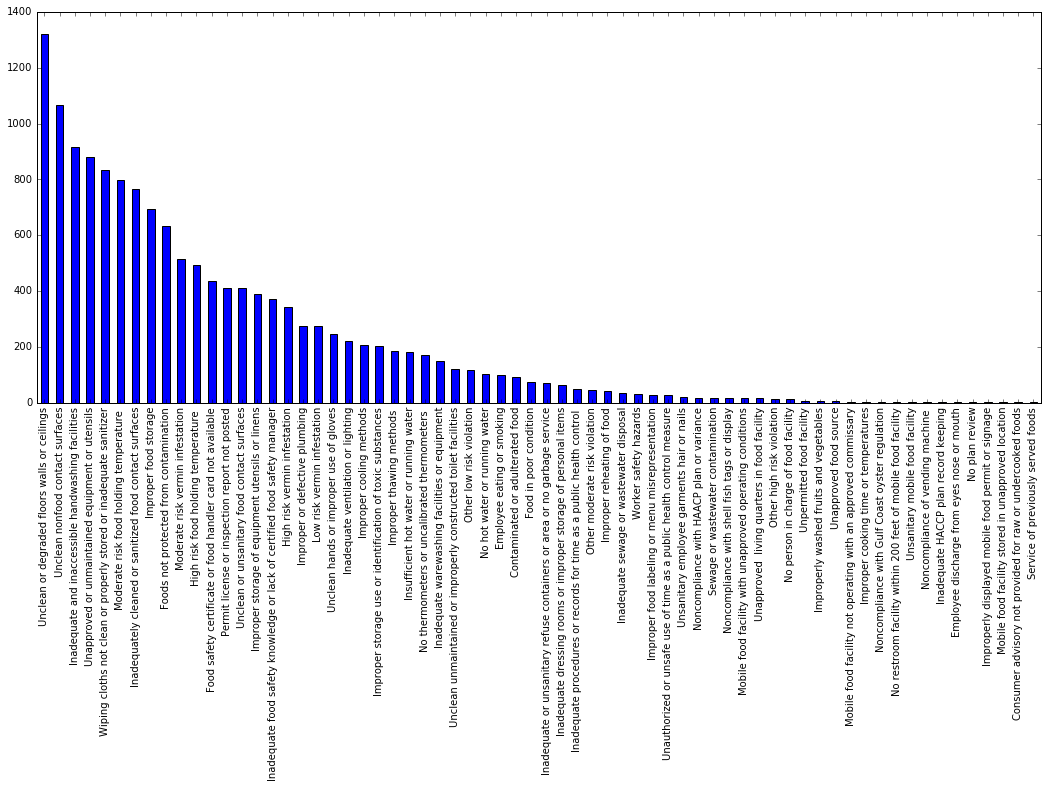

In [43]:
# Let us see how the violations are distributed
figure(figsize=[18,7])

violation_hist = violation_table['description'].value_counts().plot(kind="bar")

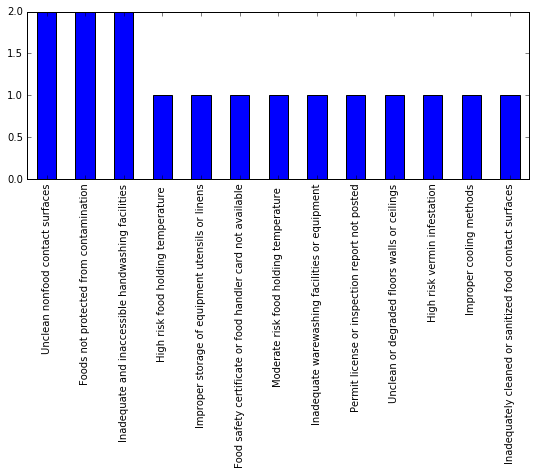

In [45]:
# Let us see what violations a restaurant can have and still get a perfect score

figure(figsize=[9,3])

perfect_scores = violation_table[violation_table['Score'] == 100]

violation_hist = perfect_scores['description'].value_counts().plot(kind="bar")

#perfect_scores

In [46]:
violation_table['description'].value_counts()[:10]

Unclean or degraded floors walls or ceilings                          1321
Unclean nonfood contact surfaces                                      1068
Inadequate and inaccessible handwashing facilities                     915
Unapproved or unmaintained equipment or utensils                       880
Wiping cloths not clean or properly stored or inadequate sanitizer     835
Moderate risk food holding temperature                                 798
Inadequately cleaned or sanitized food contact surfaces                765
Improper food storage                                                  695
Foods not protected from contamination                                 634
Moderate risk vermin infestation                                       515
Name: description, dtype: int64

In [49]:
# apparently high risk vermin infestations are minor violations
# If that is minor, what is a severe violation

df_violations_plus['ViolationSeverity'].drop_duplicates()

# well aparently there are only minor violations

0    Minor
Name: ViolationSeverity, dtype: object

In [50]:
# Let us bin health violations using the cities quantizations

descriptions = ['Poor', 'Needs Improvement', 'Adequate', 'Good']
bins = [-1, 70, 85, 90, 100]

# copy the scores from our grouped DataFrame, DataFrames manipulate
# in place if we do not explicitly copy them.
scores = violation_table['Score'].copy()
violation_transform = violation_table.copy()

# built-in pandas funcion which assigns each data point in 
# 'scores' to an interval in 'bins' with labels of 'descriptions'
discretized_scores = pd.cut(scores, bins ,labels=descriptions)
violation_transform["Scores"] = discretized_scores

In [51]:
grouped = violation_transform.groupby('Scores')

In [52]:
# let us find the most common violations for each group

# a funtion that takes a DataFrame and returns the top violations
def common_offenses(df):
    return pd.DataFrame(df['description'].value_counts(normalize=True) * 100).head(10)

top_offenses = grouped.apply(common_offenses)
top_offenses

description
Scores                                                                           
Poor              Unclean or degraded floors walls or ceilings           6.959153
                  Unclean or unsanitary food contact surfaces            6.656581
                  Unclean nonfood contact surfaces                       6.278366
                  High risk vermin infestation                           6.051437
                  Unapproved or unmaintained equipment or utensils       5.824508
                  Foods not protected from contamination                 5.748865
                  Inadequate and inaccessible handwashing facilities     5.673222
                  High risk food holding temperature                     5.295008
                  Inadequate food safety knowledge or lack of cer...     5.068079
                  Improper food storage                                  4.084720
Needs Improvement Unclean or degraded floors walls or ceilings           8.003078
                  Unclean nonfood contact surfaces                       6.887264
                  Inadequate and inaccessible handwashing facilities     5.867641
                  Unapproved or unmaintained equipment or utensils       5.848403
                  Foods not protected from contamination                 5.367449
                  Inadequately cleaned or sanitized food contact ...     5.348211
                  High risk food holding temperature                     4.924971
                  Wiping cloths not clean or properly stored or i...     4.732589
                  Moderate risk food holding temperature                 4.636399
                  Improper food storage                                  4.386302
Adequate          Unclean or degraded floors walls or ceilings           8.735189
                  Unclean nonfood contact surfaces                       7.495178
                  Inadequate and inaccessible handwashing facilities     7.192064
                  Moderate risk food holding temperature                 6.999173
                  Inadequately cleaned or sanitized food contact ...     6.255167
                  Unapproved or unmaintained equipment or utensils       6.227611
                  Wiping cloths not clean or properly stored or i...     6.062276
                  Improper food storage                                  4.877377
                  Moderate risk vermin infestation                       4.408928
                  Foods not protected from contamination                 4.243593
Good              Unclean or degraded floors walls or ceilings          11.272727
                  Unclean nonfood contact surfaces                       8.068182
                  Wiping cloths not clean or properly stored or i...     7.227273
                  Inadequate and inaccessible handwashing facilities     6.227273
                  Unapproved or unmaintained equipment or utensils       6.204545
                  Moderate risk food holding temperature                 5.954545
                  Food safety certificate or food handler card no...     5.386364
                  Improper food storage                                  5.363636
                  Inadequately cleaned or sanitized food contact ...     4.931818
                  Permit license or inspection report not posted         3.568182

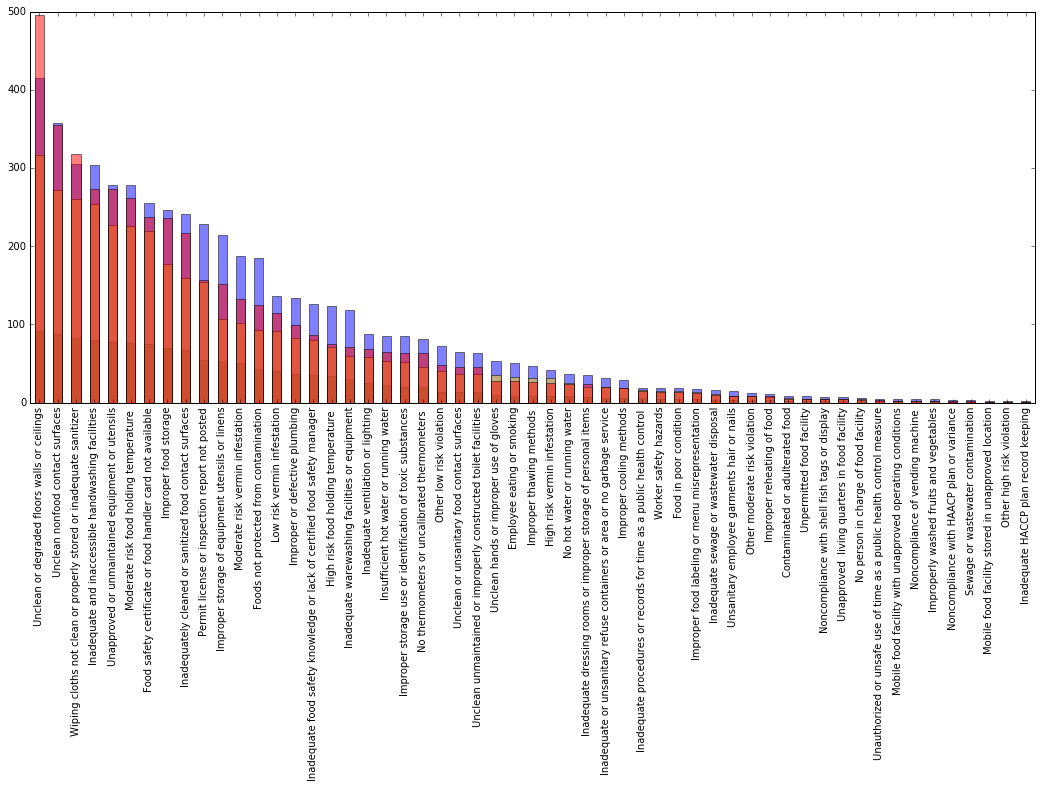

In [55]:
figure(figsize=[18,7])
colors = ['r', 'gold', 'blue', 'g']

for name, group in grouped:
    group['description'].value_counts().plot(kind="bar", alpha=0.5, color=colors.pop())

<a id="results"></a>

## ___Communicate Results___

Each restaurant is geographically binned using the D3.js hexbin plugin.  The color gradient of each hexagon reflects the median inspection score of the bin, and the radius of the hexagon is proportional to the number of restaurants in the bin.  Binning is first computed with a uniform hexagon radius over the map, and then the radius of each individual hexagon is adjusted for how many restaurants ended up in its bin. 

Large blue hexagons represent many high scoring restaurants and small red mean a few very poorly scoring restaurants.  The controls on the map allow users to adjust the radius (__Bin:__) of the hexagon for computing the binning as well as the range (__Score:__) of scores to show/use on the map.  The color of the __Bin:__ slider represents the median color of the __Score:__ range and its size represents the radius of the hexagons.  The colors of each of the __Score:__ sliders represent the threshold color for that score, i.e. if the range is 40 - 100 the left slider's color corresponds to a score of 40 and the right slider to a score of 100.  The colors for every score in-between are computed using a linear gradient.  

&nbsp;
